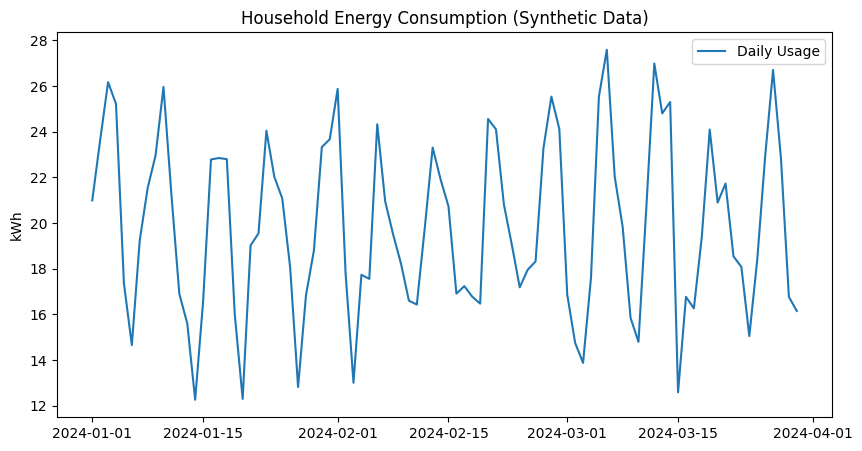

 Data Loaded and Visualized.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


np.random.seed(42)


dates = pd.date_range(start='2024-01-01', end='2024-03-30', freq='D')

base_load = 20
seasonality = 5 * np.sin(np.arange(len(dates)) * (2 * np.pi / 7))
noise = np.random.normal(0, 2, len(dates))

consumption = base_load + seasonality + noise

df = pd.DataFrame({'Date': dates, 'Consumption': consumption})
df.set_index('Date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Consumption'], label='Daily Usage')
plt.title('Household Energy Consumption (Synthetic Data)')
plt.ylabel('kWh')
plt.legend()
plt.show()

print(" Data Loaded and Visualized.")

In [4]:

print(" Engineering features...")

df['lag_1'] = df['Consumption'].shift(1)

df['lag_7'] = df['Consumption'].shift(7)

df['rolling_mean_7'] = df['Consumption'].shift(1).rolling(window=7).mean()

df_model = df.dropna().copy()

print("Features created!")
print(df_model.head())

 Engineering features...
Features created!
            Consumption      lag_1      lag_7  rolling_mean_7
Date                                                         
2024-01-08    21.534869  19.249268  20.993428       21.040026
2024-01-09    22.970209  21.534869  23.632629       21.117375
2024-01-10    25.959760  22.970209  26.170017       21.022743
2024-01-11    21.242583  25.959760  25.215478       20.992706
2024-01-12    16.899122  21.242583  17.362275       20.425150


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

features = ['lag_1', 'lag_7', 'rolling_mean_7']
X = df_model[features]
y = df_model['Consumption']

split_point = int(len(X) * 0.8) # 80% for training

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model Trained on {len(X_train)} days of data.")

Model Trained on 66 days of data.


------------------------------
MODEL REPORT
Mean Absolute Error (MAE): 2.0959 kWh
------------------------------


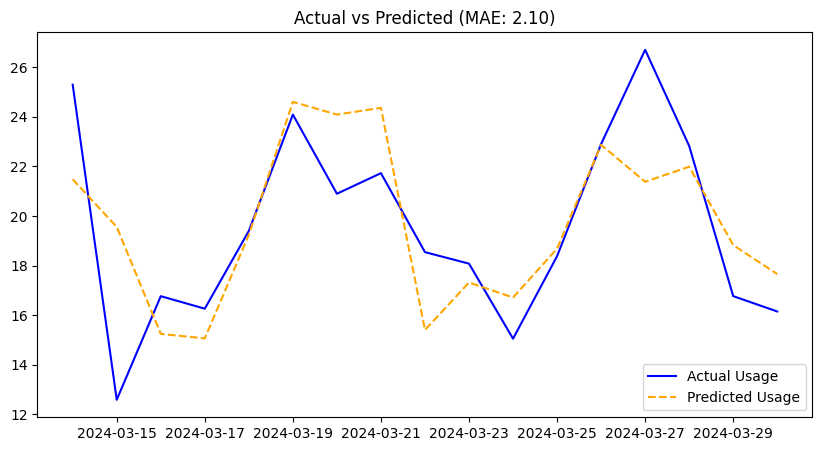

In [6]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("-" * 30)
print(f"MODEL REPORT")
print(f"Mean Absolute Error (MAE): {mae:.4f} kWh")
print("-" * 30)

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Usage', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Usage', color='orange', linestyle='--')
plt.title(f"Actual vs Predicted (MAE: {mae:.2f})")
plt.legend()
plt.show()

In [7]:
print("Generating Forecast...")

last_history = df['Consumption'].tolist()
forecast_results = []

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

for date in future_dates:
    lag_1_val = last_history[-1]
    lag_7_val = last_history[-7]
    rolling_val = np.mean(last_history[-7:])

    X_next = pd.DataFrame([[lag_1_val, lag_7_val, rolling_val]], columns=features)


    next_pred = model.predict(X_next)[0]


    last_history.append(next_pred)


    forecast_results.append({'Date': date, 'Predicted_Consumption': next_pred})


forecast_df = pd.DataFrame(forecast_results)

print("Forecast Generated:")
print(forecast_df)

Generating Forecast...
Forecast Generated:
        Date  Predicted_Consumption
0 2024-03-31              15.509684
1 2024-04-01              17.838371
2 2024-04-02              21.674682
3 2024-04-03              25.302861
4 2024-04-04              23.174737
5 2024-04-05              18.248256
6 2024-04-06              16.785918


In [8]:
csv_filename = 'forecast_next_7_days.csv'
forecast_df.to_csv(csv_filename, index=False)

print(f" File '{csv_filename}' saved successfully.")

from google.colab import files
try:
    files.download(csv_filename)
    print(f"Downloading {csv_filename} now...")
except:
    print("If the file didn't download automatically, check the Folder icon on the left.")

 File 'forecast_next_7_days.csv' saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>